# Let's get started, using awesome Language, PYTHON! :P

# Importing Packages from different Libraries..

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import sklearn.feature_selection
from sklearn import metrics


colour = "\033[1;30;43m"
%matplotlib inline

C:\Users\SHAHID BHAGAT SINGH\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#importing data..
data = pd.read_csv("sample_data.csv")

In [3]:
#looking into column names of data..
print data.columns

Index([u'Customer_ID', u'Application_date', u'App_status', u'Applied_Loan_Amt',
       u'Approved_loan_amount', u'Branch_name', u'Book_Date', u'Car',
       u'Cheque_bounce_flag', u'City_of_Loan', u'City_residence',
       u'Customer_level_ltv', u'Dealer_city', u'Dealer_ID', u'Designation',
       u'DOB', u'Down_payment', u'Edu_qualification', u'Employment_sector',
       u'Employment_type', u'Gender', u'Installment_amt',
       u'Insurance_premium_amt', u'Insurance_sum_assured', u'Insurance_taken',
       u'Interest_rate', u'Loan_maturity_date', u'Loan_repayment_mode',
       u'Vehicle_Year', u'Marital Status', u'Nationality',
       u'Nature_business_industry', u'Monthly Income', u'New/Used',
       u'No_of Loans', u'Phone_no_flag', u'promo_flag', u'Region',
       u'Residence_change_flag', u'Residence_type', u'Tenure_loan',
       u'Vehicle_model', u'Year_in_curr_emp', u'No_of_dependents', u'Car_Cost',
       u'Default (Target)'],
      dtype='object')


In [4]:
#checking if the data is balanced or not...
print data['Default (Target)'].value_counts() 

1    516
0    484
Name: Default (Target), dtype: int64


In [5]:
#getting more knowledge about data..
data.head()

,Customer_ID,Application_date,App_status,Applied_Loan_Amt,Approved_loan_amount,Branch_name,Book_Date,Car,Cheque_bounce_flag,City_of_Loan,...,promo_flag,Region,Residence_change_flag,Residence_type,Tenure_loan,Vehicle_model,Year_in_curr_emp,No_of_dependents,Car_Cost,Default (Target)
0,1,6/17/2014,Approved,1827908,1560894,Nehru Nagar,6/27/2014,Yes,1,Bangalore,...,Yes,North,0,Owned,24,Nissan GTR,7,3,1972708,1
1,2,6/30/2014,Approved,2889515,1965892,Laxmi nagar,07-10-2014,No,0,Mumbai,...,Yes,North,0,Owned,24,BMW X3,8,5,3021761,1
2,3,05-04-2014,Approved,2676500,2323693,Cannaught Place,5/14/2014,No,0,Bangalore,...,Yes,East,0,Owned,24,GMC,10,3,2950349,1
3,4,12-05-2014,Approved,2641164,1692244,Nehru Nagar,12/15/2014,No,0,New Delhi,...,Yes,North,0,Owned,24,GMC,9,5,2914200,0
4,5,8/15/2014,Approved,2281611,1624686,Laxmi nagar,8/25/2014,Yes,0,Bangalore,...,Yes,East,0,Owned,22,Audi A7,8,4,2535199,0


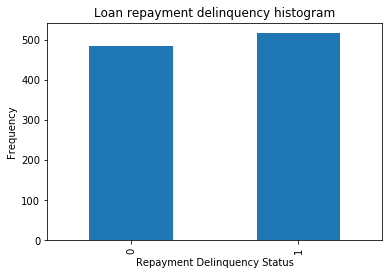

In [6]:
#confirmed from the below bargarph, that data is very much balanced..

count_target = pd.value_counts(data['Default (Target)'], sort = True).sort_index()
count_target.plot(kind = 'bar')
plt.title("Loan repayment delinquency histogram")
plt.xlabel("Repayment Delinquency Status")
plt.ylabel("Frequency")

### We can see from above Graph the Data is very much Balanced... !



## Below we are dividing the data into Input(X) and output(Y) Data sets..

In [7]:
X = data.drop('Default (Target)', 1)
Y = data['Default (Target)']

In [8]:
#looking into input dataset...

print type(X)
X.head()

<class 'pandas.core.frame.DataFrame'>


,Customer_ID,Application_date,App_status,Applied_Loan_Amt,Approved_loan_amount,Branch_name,Book_Date,Car,Cheque_bounce_flag,City_of_Loan,...,Phone_no_flag,promo_flag,Region,Residence_change_flag,Residence_type,Tenure_loan,Vehicle_model,Year_in_curr_emp,No_of_dependents,Car_Cost
0,1,6/17/2014,Approved,1827908,1560894,Nehru Nagar,6/27/2014,Yes,1,Bangalore,...,1,Yes,North,0,Owned,24,Nissan GTR,7,3,1972708
1,2,6/30/2014,Approved,2889515,1965892,Laxmi nagar,07-10-2014,No,0,Mumbai,...,1,Yes,North,0,Owned,24,BMW X3,8,5,3021761
2,3,05-04-2014,Approved,2676500,2323693,Cannaught Place,5/14/2014,No,0,Bangalore,...,1,Yes,East,0,Owned,24,GMC,10,3,2950349
3,4,12-05-2014,Approved,2641164,1692244,Nehru Nagar,12/15/2014,No,0,New Delhi,...,1,Yes,North,0,Owned,24,GMC,9,5,2914200
4,5,8/15/2014,Approved,2281611,1624686,Laxmi nagar,8/25/2014,Yes,0,Bangalore,...,1,Yes,East,0,Owned,22,Audi A7,8,4,2535199


In [9]:
# getting more knowldge about data, about every feature of data..

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 46 columns):
Customer_ID                 1000 non-null int64
Application_date            1000 non-null object
App_status                  1000 non-null object
Applied_Loan_Amt            1000 non-null int64
Approved_loan_amount        1000 non-null int64
Branch_name                 1000 non-null object
Book_Date                   1000 non-null object
Car                         1000 non-null object
Cheque_bounce_flag          1000 non-null int64
City_of_Loan                1000 non-null object
City_residence              1000 non-null object
Customer_level_ltv          1000 non-null int64
Dealer_city                 1000 non-null object
Dealer_ID                   1000 non-null int64
Designation                 1000 non-null object
DOB                         1000 non-null object
Down_payment                1000 non-null int64
Edu_qualification           1000 non-null object
Employment_sector  

In [10]:
# Decide which categorical variables you want to use in model
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'Application_date' has 337 unique categories
Feature 'App_status' has 1 unique categories
Feature 'Branch_name' has 6 unique categories
Feature 'Book_Date' has 337 unique categories
Feature 'Car' has 2 unique categories
Feature 'City_of_Loan' has 5 unique categories
Feature 'City_residence' has 5 unique categories
Feature 'Dealer_city' has 5 unique categories
Feature 'Designation' has 6 unique categories
Feature 'DOB' has 887 unique categories
Feature 'Edu_qualification' has 1 unique categories
Feature 'Employment_sector' has 1 unique categories
Feature 'Employment_type' has 2 unique categories
Feature 'Gender' has 2 unique categories
Feature 'Insurance_taken' has 1 unique categories
Feature 'Loan_maturity_date' has 356 unique categories
Feature 'Loan_repayment_mode' has 3 unique categories
Feature 'Marital Status' has 2 unique categories
Feature 'Nationality' has 1 unique categories
Feature 'Nature_business_industry' has 5 unique categories
Feature 'New/Used' has 2 unique cate

In [11]:
# geting more depth into categorical features..
print(X['Application_date'].value_counts().sort_values(ascending=False).head(10))
print(X['Book_Date'].value_counts().sort_values(ascending=False).head(10))
print(X['Loan_maturity_date'].value_counts().sort_values(ascending=False).head(10))
print(X['DOB'].value_counts().sort_values(ascending=False).head(10))

02-03-2014    9
3/25/2014     8
4/27/2014     8
9/26/2014     8
09-06-2014    8
8/15/2014     8
3/18/2014     7
8/22/2014     7
6/24/2014     6
07-08-2014    6
Name: Application_date, dtype: int64
2/13/2014     9
10-06-2014    8
05-07-2014    8
04-04-2014    8
8/25/2014     8
9/16/2014     8
3/28/2014     7
09-01-2014    7
10-10-2014    6
02-08-2014    6
Name: Book_Date, dtype: int64
1/14/2015     8
12/28/2014    7
10/18/2014    7
10/28/2014    6
04-08-2014    6
7/15/2014     6
6/16/2014     6
12-03-2014    6
09-12-2014    6
7/24/2014     6
Name: Loan_maturity_date, dtype: int64
10-07-1982    5
1/24/1979     4
7/28/1980     3
6/26/1978     3
11/17/1978    2
11-01-1977    2
4/22/1984     2
3/29/1978     2
09-10-1978    2
09-05-1982    2
Name: DOB, dtype: int64


In [12]:
# standardising the four different DATE features from data set..
from dateutil.parser import parse
def date_formating_and_strToDate(date):
    if (date == "%d-%m-%Y"): 
        date = date.strftime("%m/%d/%Y")
    return parse(date)
for i, date in enumerate(X['Application_date']):
    X.iloc[i,1] = date_formating_and_strToDate(date).strftime("%Y/%m/%d")   
for i, date in enumerate(X['Book_Date']):
    X.iloc[i,6] = date_formating_and_strToDate(date).strftime("%Y/%m/%d")
for i, date in enumerate(X['Loan_maturity_date']):
    X.iloc[i,26] = date_formating_and_strToDate(date).strftime("%Y/%m/%d")
for i, date in enumerate(X['DOB']):
    X.iloc[i,15] = date_formating_and_strToDate(date).strftime("%Y/%m/%d")


In [13]:
# converting DATE features into ordinal type..
def convert_date_to_ordinal(date):
    return datetime.strptime(date, '%Y/%M/%d').toordinal()
for i, date in enumerate(X['Application_date']):
    X.iloc[i,1] = convert_date_to_ordinal(date)
for i, date in enumerate(X['Book_Date']):
    X.iloc[i,6] = convert_date_to_ordinal(date) 
for i, date in enumerate(X['Loan_maturity_date']):
    X.iloc[i,26] = convert_date_to_ordinal(date)

In [14]:
#checking if there is any benfit of doing above activity..
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'Application_date' has 31 unique categories
Feature 'App_status' has 1 unique categories
Feature 'Branch_name' has 6 unique categories
Feature 'Book_Date' has 41 unique categories
Feature 'Car' has 2 unique categories
Feature 'City_of_Loan' has 5 unique categories
Feature 'City_residence' has 5 unique categories
Feature 'Dealer_city' has 5 unique categories
Feature 'Designation' has 6 unique categories
Feature 'DOB' has 887 unique categories
Feature 'Edu_qualification' has 1 unique categories
Feature 'Employment_sector' has 1 unique categories
Feature 'Employment_type' has 2 unique categories
Feature 'Gender' has 2 unique categories
Feature 'Insurance_taken' has 1 unique categories
Feature 'Loan_maturity_date' has 62 unique categories
Feature 'Loan_repayment_mode' has 3 unique categories
Feature 'Marital Status' has 2 unique categories
Feature 'Nationality' has 1 unique categories
Feature 'Nature_business_industry' has 5 unique categories
Feature 'New/Used' has 2 unique categor

####  from above details we conclude, that we have decresed the no. of unique categories of four different DATE features in dataset namely: Application_date, Book_Date, DOB, Loan_maturity_date  

In [15]:
# create Age feature from DOB
def age_cal(dob):
    b_date = datetime.strptime(dob, '%Y/%m/%d')
    return ((datetime.today() - b_date).days/365)
for i, date in enumerate(X['DOB']):
    X.iloc[i,0] = age_cal(date)

In [16]:
#Now as we have intoduced AGE feature in dataset, so we are removing DOB feature from dataset.. 
del X['DOB']

In [17]:
#setting the AGE feature..
X=X.rename(columns = {'Customer_ID':'Age'})

In [18]:
# Checking the details of what all we have done above.. And finally looking into dataset
col_names = ["Application_date","Book_Date","Loan_maturity_date","Age"]
#print(X['Application_date'].value_counts().sort_values(ascending=False).head(10))
print X[col_names].head(10)
X.head()

  Application_date Book_Date Loan_maturity_date  Age
0           735250    735260             735254   38
1           735263    735243             735236   36
2           735237    735247             735240   35
3           735238    735248             735606   36
4           735248    735258             735249   40
5           735256    735235             735253   40
6           735247    735257             735246   33
7           735240    735250             735243   41
8           735243    735253             735245   31
9           735263    735243             735263   35


,Age,Application_date,App_status,Applied_Loan_Amt,Approved_loan_amount,Branch_name,Book_Date,Car,Cheque_bounce_flag,City_of_Loan,...,Phone_no_flag,promo_flag,Region,Residence_change_flag,Residence_type,Tenure_loan,Vehicle_model,Year_in_curr_emp,No_of_dependents,Car_Cost
0,38,735250,Approved,1827908,1560894,Nehru Nagar,735260,Yes,1,Bangalore,...,1,Yes,North,0,Owned,24,Nissan GTR,7,3,1972708
1,36,735263,Approved,2889515,1965892,Laxmi nagar,735243,No,0,Mumbai,...,1,Yes,North,0,Owned,24,BMW X3,8,5,3021761
2,35,735237,Approved,2676500,2323693,Cannaught Place,735247,No,0,Bangalore,...,1,Yes,East,0,Owned,24,GMC,10,3,2950349
3,36,735238,Approved,2641164,1692244,Nehru Nagar,735248,No,0,New Delhi,...,1,Yes,North,0,Owned,24,GMC,9,5,2914200
4,40,735248,Approved,2281611,1624686,Laxmi nagar,735258,Yes,0,Bangalore,...,1,Yes,East,0,Owned,22,Audi A7,8,4,2535199


In [19]:
# Assigning four different features interms of 0's and 1's..

X['Marital Status'] = [0 if x == 'Divorced' else 1 for x in X['Marital Status']]
X['Car'] = [1 if x == 'Yes' else 0 for x in X['Car']]
X['promo_flag'] = [1 if x == 'Yes' else 0 for x in X['promo_flag']]

In [20]:
# Checking the  what we have done above..

converted_col_names = ["Marital Status","Car","promo_flag"]
X[converted_col_names].head()

,Marital Status,Car,promo_flag
0,1,1,1
1,1,0,1
2,1,0,1
3,1,0,1
4,1,1,1


In [21]:
# Looking more depth into features of dataset if there is anything we can make our data perfect..

def feature_details(feature_name):
    print "\n" + colour + feature_name 
    # print bcolors.BOLD + feature_name + bcolors.ENDC
    return data[feature_name].value_counts()

for i, name in enumerate(data.columns):
    print feature_details(name)


Customer_ID
1000    1
329     1
342     1
341     1
340     1
339     1
338     1
337     1
336     1
335     1
334     1
333     1
332     1
331     1
330     1
328     1
313     1
327     1
326     1
325     1
324     1
323     1
322     1
321     1
320     1
319     1
318     1
317     1
316     1
315     1
       ..
686     1
658     1
685     1
684     1
683     1
682     1
681     1
680     1
679     1
678     1
677     1
676     1
675     1
674     1
673     1
672     1
671     1
670     1
669     1
668     1
667     1
666     1
665     1
664     1
663     1
662     1
661     1
660     1
659     1
1       1
Name: Customer_ID, dtype: int64

Application_date
02-03-2014    9
3/25/2014     8
4/27/2014     8
9/26/2014     8
09-06-2014    8
8/15/2014     8
3/18/2014     7
8/22/2014     7
12-08-2014    6
09-03-2014    6
2/20/2014     6
11/23/2014    6
8/14/2014     6
11-02-2014    6
9/30/2014     6
5/25/2014     6
1/29/2014     6
6/24/2014     6
09-08-2014    6
6/30/2014     6
7/18/20

In [22]:
# Creating a list of dummy variables on the basis of  unique categories in the features..

todummy_list =["Car","City_of_Loan","City_residence","Dealer_city","Designation","Edu_qualification",
              "Employment_sector","Employment_type","Gender","Insurance_taken","Loan_repayment_mode",
              "Nationality","Nature_business_industry","New/Used","Region","Residence_type","Vehicle_model"]

In [23]:
# Function to dummy all the categorical variables used for modeling

def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df
X = dummy_df(X, todummy_list)

In [24]:
# Checking the dataset regarding dummy variables..
X.head(5)

,Age,Application_date,App_status,Applied_Loan_Amt,Approved_loan_amount,Branch_name,Book_Date,Cheque_bounce_flag,Customer_level_ltv,Dealer_ID,...,Region_West,Residence_type_Owned,Residence_type_Rented,Vehicle_model_Audi A5,Vehicle_model_Audi A7,Vehicle_model_BMW X3,Vehicle_model_BMW X5,Vehicle_model_GMC,Vehicle_model_Mercedez-c100,Vehicle_model_Nissan GTR
0,38,735250,Approved,1827908,1560894,Nehru Nagar,735260,1,93,45281,...,0,1,0,0,0,0,0,0,0,1
1,36,735263,Approved,2889515,1965892,Laxmi nagar,735243,0,96,54997,...,0,1,0,0,0,1,0,0,0,0
2,35,735237,Approved,2676500,2323693,Cannaught Place,735247,0,91,49429,...,0,1,0,0,0,0,0,1,0,0
3,36,735238,Approved,2641164,1692244,Nehru Nagar,735248,0,91,54328,...,0,1,0,0,0,0,0,1,0,0
4,40,735248,Approved,2281611,1624686,Laxmi nagar,735258,0,90,50604,...,0,1,0,0,1,0,0,0,0,0


In [26]:
# Looking into addtional features of dataset..
X.columns

Index([u'Age', u'Application_date', u'App_status', u'Applied_Loan_Amt',
       u'Approved_loan_amount', u'Branch_name', u'Book_Date',
       u'Cheque_bounce_flag', u'Customer_level_ltv', u'Dealer_ID',
       u'Down_payment', u'Installment_amt', u'Insurance_premium_amt',
       u'Insurance_sum_assured', u'Interest_rate', u'Loan_maturity_date',
       u'Vehicle_Year', u'Marital Status', u'Monthly Income', u'No_of Loans',
       u'Phone_no_flag', u'promo_flag', u'Residence_change_flag',
       u'Tenure_loan', u'Year_in_curr_emp', u'No_of_dependents', u'Car_Cost',
       u'Car_0', u'Car_1', u'City_of_Loan_Bangalore',
       u'City_of_Loan_Hyderabad', u'City_of_Loan_Kolkata',
       u'City_of_Loan_Mumbai', u'City_of_Loan_New Delhi',
       u'City_residence_Bhopal', u'City_residence_Chandigarh',
       u'City_residence_Lucknow', u'City_residence_Pune',
       u'City_residence_Trivandrum', u'Dealer_city_Bangalore',
       u'Dealer_city_Hyderabad', u'Dealer_city_Kolkata', u'Dealer_city_Mumbai'

In [27]:
# deleting the corelated features which will effect the accuracy of model..
del X['App_status']
del X['Branch_name']
del X['Dealer_ID']

In [28]:
# Checking the dataset after removing features..
X.head()

,Age,Application_date,Applied_Loan_Amt,Approved_loan_amount,Book_Date,Cheque_bounce_flag,Customer_level_ltv,Down_payment,Installment_amt,Insurance_premium_amt,...,Region_West,Residence_type_Owned,Residence_type_Rented,Vehicle_model_Audi A5,Vehicle_model_Audi A7,Vehicle_model_BMW X3,Vehicle_model_BMW X5,Vehicle_model_GMC,Vehicle_model_Mercedez-c100,Vehicle_model_Nissan GTR
0,38,735250,1827908,1560894,735260,1,93,144800,13633,5831,...,0,1,0,0,0,0,0,0,0,1
1,36,735263,2889515,1965892,735243,0,96,132246,10101,5799,...,0,1,0,0,0,1,0,0,0,0
2,35,735237,2676500,2323693,735247,0,91,273849,18144,9697,...,0,1,0,0,0,0,0,1,0,0
3,36,735238,2641164,1692244,735248,0,91,273036,16206,7259,...,0,1,0,0,0,0,0,1,0,0
4,40,735248,2281611,1624686,735258,0,90,253588,17666,9312,...,0,1,0,0,1,0,0,0,0,0


In [29]:
# Checking the information of each fetaure of dataset..
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 78 columns):
Age                                       1000 non-null int64
Application_date                          1000 non-null object
Applied_Loan_Amt                          1000 non-null int64
Approved_loan_amount                      1000 non-null int64
Book_Date                                 1000 non-null object
Cheque_bounce_flag                        1000 non-null int64
Customer_level_ltv                        1000 non-null int64
Down_payment                              1000 non-null int64
Installment_amt                           1000 non-null int64
Insurance_premium_amt                     1000 non-null int64
Insurance_sum_assured                     1000 non-null int64
Interest_rate                             1000 non-null float64
Loan_maturity_date                        1000 non-null object
Vehicle_Year                              1000 non-null int64
Marital Status       

# Handling missing data

In [30]:
# Checking if there is any missing or null value in the dataset..
print X.isnull().sum().sort_values(ascending=False)

Vehicle_model_Nissan GTR             0
City_of_Loan_Kolkata                 0
Year_in_curr_emp                     0
No_of_dependents                     0
Car_Cost                             0
Car_0                                0
Car_1                                0
City_of_Loan_Bangalore               0
City_of_Loan_Hyderabad               0
City_of_Loan_Mumbai                  0
Residence_change_flag                0
City_of_Loan_New Delhi               0
City_residence_Bhopal                0
City_residence_Chandigarh            0
City_residence_Lucknow               0
City_residence_Pune                  0
City_residence_Trivandrum            0
Dealer_city_Bangalore                0
Tenure_loan                          0
promo_flag                           0
Vehicle_model_Mercedez-c100          0
Installment_amt                      0
Application_date                     0
Applied_Loan_Amt                     0
Approved_loan_amount                 0
Book_Date                

#### From above results we conclude, we don't have any missing values in dataset..!

# Outlier Detection

In [31]:
# Looking for different aspects of dataset  like mean, standard deviation, Minimum Value, 1st Quartile, 2nd Quartile, 3rd Quartile and Maximum value..
X.describe()

,Age,Applied_Loan_Amt,Approved_loan_amount,Cheque_bounce_flag,Customer_level_ltv,Down_payment,Installment_amt,Insurance_premium_amt,Insurance_sum_assured,Interest_rate,...,Region_West,Residence_type_Owned,Residence_type_Rented,Vehicle_model_Audi A5,Vehicle_model_Audi A7,Vehicle_model_BMW X3,Vehicle_model_BMW X5,Vehicle_model_GMC,Vehicle_model_Mercedez-c100,Vehicle_model_Nissan GTR
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,36.320000,2.487798e+06,1.902637e+06,0.487000,92.262000,198937.739000,15060.596000,7465.465000,2.487798e+06,12.048000,...,0.268000,0.974000,0.026000,0.153000,0.12700,0.147000,0.164000,0.148000,0.131000,0.130000
std,3.178317,5.744030e+05,6.334391e+05,0.500081,2.759524,57838.156865,2872.958522,1435.621274,5.744030e+05,0.955044,...,0.443139,0.159215,0.159215,0.360168,0.33314,0.354283,0.370461,0.355278,0.337569,0.336472
min,31.000000,1.500514e+06,5.511310e+05,0.000000,83.000000,100288.000000,10014.000000,5000.000000,1.500514e+06,10.750000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,1.974156e+06,1.377706e+06,0.000000,91.000000,150285.250000,12568.750000,6283.500000,1.974156e+06,10.750000,...,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,2.484677e+06,1.893096e+06,0.000000,93.000000,196905.500000,15116.500000,7460.500000,2.484677e+06,12.750000,...,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,39.000000,2.993187e+06,2.426316e+06,1.000000,94.000000,249823.750000,17435.250000,8733.250000,2.993187e+06,12.750000,...,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,42.000000,3.493808e+06,3.251424e+06,1.000000,97.000000,299964.000000,19993.000000,9996.000000,3.493808e+06,12.750000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
# Function for Outliers in the dataset..
def find_outliers(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [33]:
X.columns

Index([u'Age', u'Application_date', u'Applied_Loan_Amt',
       u'Approved_loan_amount', u'Book_Date', u'Cheque_bounce_flag',
       u'Customer_level_ltv', u'Down_payment', u'Installment_amt',
       u'Insurance_premium_amt', u'Insurance_sum_assured', u'Interest_rate',
       u'Loan_maturity_date', u'Vehicle_Year', u'Marital Status',
       u'Monthly Income', u'No_of Loans', u'Phone_no_flag', u'promo_flag',
       u'Residence_change_flag', u'Tenure_loan', u'Year_in_curr_emp',
       u'No_of_dependents', u'Car_Cost', u'Car_0', u'Car_1',
       u'City_of_Loan_Bangalore', u'City_of_Loan_Hyderabad',
       u'City_of_Loan_Kolkata', u'City_of_Loan_Mumbai',
       u'City_of_Loan_New Delhi', u'City_residence_Bhopal',
       u'City_residence_Chandigarh', u'City_residence_Lucknow',
       u'City_residence_Pune', u'City_residence_Trivandrum',
       u'Dealer_city_Bangalore', u'Dealer_city_Hyderabad',
       u'Dealer_city_Kolkata', u'Dealer_city_Mumbai', u'Dealer_city_New Delhi',
       u'Designat

In [34]:
# Checking of outliers are removed from the dataset..
for col_name in X:
    tukey_indices, tukey_values = find_outliers(X['Interest_rate'])
    print tukey_indices,tukey_values


[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []
[] []


#### Above nullvalue shows , removal of outliers in the datasets..!

In [35]:
# Histogram function..
def plot_histogram(x):
    plt.hist(x, color='blue', alpha=0.5)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

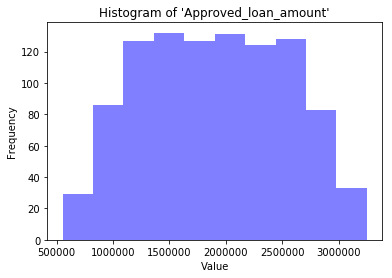

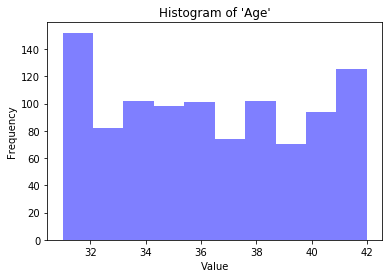

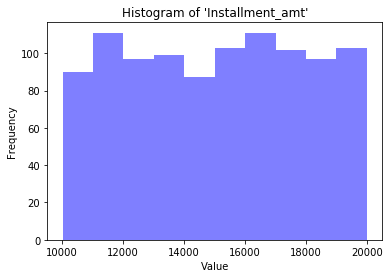

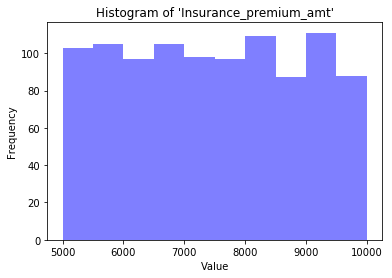

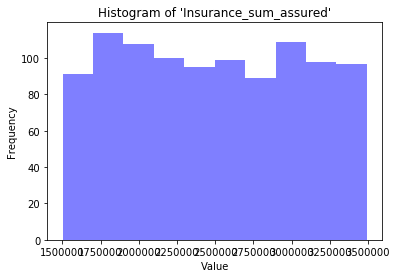

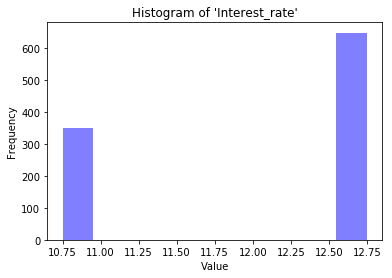

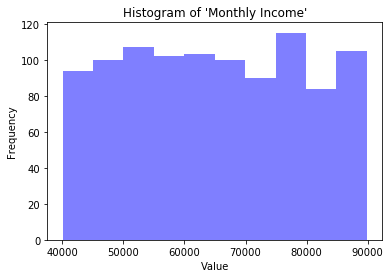

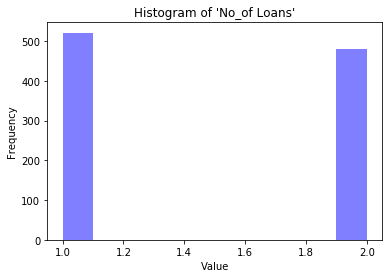

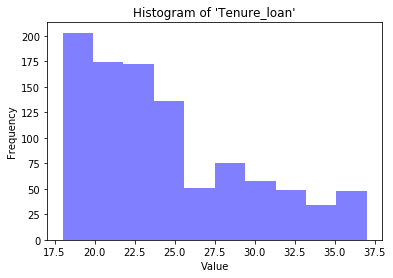

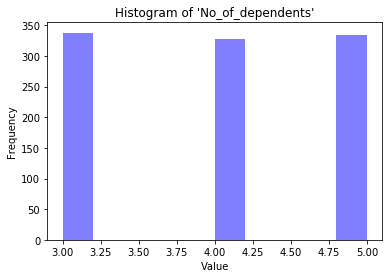

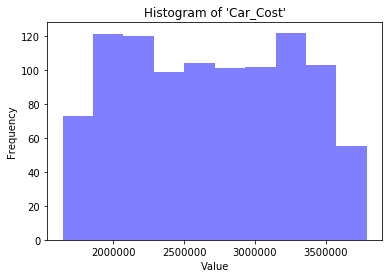

In [36]:
# Ploting histogram on different features of dataset..
plot_histogram(X['Approved_loan_amount'])
plot_histogram(X['Age'])
plot_histogram(X['Installment_amt'])
plot_histogram(X['Insurance_premium_amt'])
plot_histogram(X['Insurance_sum_assured'])
plot_histogram(X['Interest_rate'])
plot_histogram(X['Monthly Income'])
plot_histogram(X['No_of Loans'])
plot_histogram(X['Tenure_loan'])
plot_histogram(X['No_of_dependents'])
plot_histogram(X['Car_Cost'])

### From above blank values and Graphs we can simply conclude, there is no outliers in the data, we are prefect to proceed further... !

# PCA Method

In [37]:
# Use PCA from sklearn.decompostion to find principal components
pca = PCA(n_components=20)
X_pca = pd.DataFrame(pca.fit_transform(X))

In [38]:
print(X_pca.head(5))

             0              1              2             3            4   \
0 -1.178976e+06 -327100.560718  -58593.988708 -21493.072957  1929.928788   
1  5.925819e+05  288411.411540  -95423.857235   4842.645981  4973.060198   
2  5.361313e+05 -161381.877254  100622.504721  21157.765848 -3427.739019   
3  1.522662e+05  343594.238478   85443.679105  -1564.091750 -1423.441008   
4 -4.228981e+05   67852.452207   69275.185137 -21292.585309 -2637.458765   

            5           6           7          8         9         10  \
0  1368.437446  -27.670092    7.263830   2.391412 -0.058576  1.660230   
1  1630.449031  -57.378801    4.552814  14.771209  1.118327 -0.161720   
2 -2031.382932  -37.703867    3.725839 -11.137410 -1.465193 -1.448982   
3   320.709552  295.331966 -115.578597 -11.270553 -2.453348 -0.116558   
4 -1895.663713  -34.292596   10.122785   0.358940 -1.929211  3.879856   

         11        12        13        14        15        16        17  \
0  0.776954 -1.515716  0.0321

In [39]:
# Use train_test_split in sklearn.cross_validation to split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, train_size=0.70, random_state=1)

In [40]:
# The total number of features have grown substantially after dummying and adding interaction terms
print(data.shape)
print(X_pca.shape)

(1000, 46)
(1000, 20)


In [41]:
# Function to build model and find model performance
def find_model_perf(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test)]
    auc = roc_auc_score(y_test, y_hat)
    return auc

In [42]:
# Find performance of model using preprocessed data
auc_processed = find_model_perf(X_train, y_train, X_test, y_test)
print(auc_processed)

0.432497438867


### from the Above AUC percentage , we conclude that PCA is not atall benefited in this dataset..!
### Now Lets jump to the main Model Building Part.. :)

# MODEL BUILDING USING PROCESSED DATA..!

In [43]:
# Use train_test_split in sklearn.cross_validation to split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.70, random_state=24)

In [45]:
# The total number of features have grown substantially after dummying and adding interaction terms, Lets check it..
print(data.shape)
print (X.shape)

(1000, 46)
(1000, 78)


In [46]:
# large set of features can cause overfitting and also slow computing
# Used feature selection to select the most important features
select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

C:\Users\SHAHID BHAGAT SINGH\Anaconda2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [18 47 48 53 57] are constant.
  UserWarning)
C:\Users\SHAHID BHAGAT SINGH\Anaconda2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [47]:
# Look into selected input trained dataset..
print(X_train_selected.columns)

Index([u'Age', u'Vehicle_Year', u'No_of Loans', u'No_of_dependents',
       u'City_of_Loan_Hyderabad', u'City_of_Loan_Mumbai',
       u'City_residence_Pune', u'City_residence_Trivandrum',
       u'Dealer_city_Bangalore', u'Dealer_city_Hyderabad',
       u'Dealer_city_Kolkata', u'Dealer_city_Mumbai',
       u'Loan_repayment_mode_Cheque', u'Loan_repayment_mode_Standing Ins',
       u'Nature_business_industry_Manufacturing',
       u'Nature_business_industry_Production', u'Residence_type_Owned',
       u'Residence_type_Rented', u'Vehicle_model_BMW X3',
       u'Vehicle_model_BMW X5'],
      dtype='object')


## Lets Create the Base Model, to track the model improvement..

In [48]:
# Base model function..
def base_model(X):
    y = np.zeros(X.shape[0])
    return y

In [49]:
# Lets check the accuracy of my base model
y_base_model = base_model(X_test_selected)
from sklearn.metrics import accuracy_score
base_acc =accuracy_score(y_test,y_base_model)
print "Base rate accuracy is %2.2f" %base_acc

Base rate accuracy is 0.46


#### And our base rate model is 46% correct, lets check if our logistic model can beat this.

In [50]:
# Function to build model and find model performance
model = LogisticRegression()
def find_model_perf(X_train_selected, y_train, X_test_selected, y_test):
    model.fit(X_train_selected, y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test_selected)]
    y_pred_class = model.predict(X_test_selected)
    true_value = ('True:', y_test.values[0:25])
    predicted_values = ('Pred:', y_pred_class [0:25])
    conf_matrix = (metrics.confusion_matrix(y_test, y_pred_class))
    y_pred_prob = model.predict_proba(X_test_selected)[:, 1]
    auc = roc_auc_score(y_test, y_hat)
    return(auc,true_value,predicted_values, conf_matrix,y_pred_prob)

In [51]:
# Find performance of model using preprocessed data
auc_processed, tru_values, pred_values, confussion_matrix , y_pre_prob, = find_model_perf(X_train_selected, y_train, X_test_selected, y_test)
logis_acc = accuracy_score(y_test,model.predict(X_test_selected))
print ("Logistic Accuracy is %2.2f" %logis_acc)


Logistic Accuracy is 0.60


In [52]:
# Find improvement in the model..
print('Our Base Rate Accuracy model: {bs}'.format(bs=base_acc))
print ("Logistic Regression Accuracy is %2.2f" %logis_acc)
acc_improve = ((logis_acc-base_acc)/base_acc)*100
print('Model improvement of Accuracy: is %2.0f' %acc_improve)

Our Base Rate Accuracy model: 0.46
Logistic Regression Accuracy is 0.60
Model improvement of Accuracy: is 30


###  From above summary,Improvement rate of our logistic model is very good, because Logistic algo is mostly used to interpret the Dataset and if we talk about Accuracy wise we mostly depend on Random forest and so on alogs..

### Now let's find the intercept and cofficents of our Model using graphs as well..

In [53]:
# Print intercept and other coeff
print 'Estimated intercept Coeff is',model.intercept_ # 'intercept' is beta not value(B0)
print 'Number of variables in the model', len(model.coef_) # 'coefficient' is the B1,B2,B3... B13 values, 'len' is the length that is 13
cof = np.array(model.coef_).reshape(20,1)
cols = np.array(X_train_selected.columns).reshape(20,1)
print 'Coeff of the features are-'
print np.concatenate((cols,cof), axis=1).reshape(20,2)

Estimated intercept Coeff is [-0.00113375]
Number of variables in the model 1
Coeff of the features are-
[['Age' 0.042508274451647184]
 ['Vehicle_Year' -0.0006446479394679819]
 ['No_of Loans' -0.16594522034315415]
 ['No_of_dependents' -0.09702577419912405]
 ['City_of_Loan_Hyderabad' -0.2567962230002105]
 ['City_of_Loan_Mumbai' 0.2753998306503754]
 ['City_residence_Pune' 0.2513883597394345]
 ['City_residence_Trivandrum' -0.2918838908604404]
 ['Dealer_city_Bangalore' 0.3234695008383385]
 ['Dealer_city_Hyderabad' -0.26862451170021784]
 ['Dealer_city_Kolkata' 0.35897987264950376]
 ['Dealer_city_Mumbai' 0.23975740917408558]
 ['Loan_repayment_mode_Cheque' -0.1894821993027244]
 ['Loan_repayment_mode_Standing Ins' 0.1378126607498232]
 ['Nature_business_industry_Manufacturing' -0.21195084845368733]
 ['Nature_business_industry_Production' 0.3099659250035334]
 ['Residence_type_Owned' 0.2829213280385636]
 ['Residence_type_Rented' -0.28405507334526126]
 ['Vehicle_model_BMW X3' 0.2382007431913876]
 

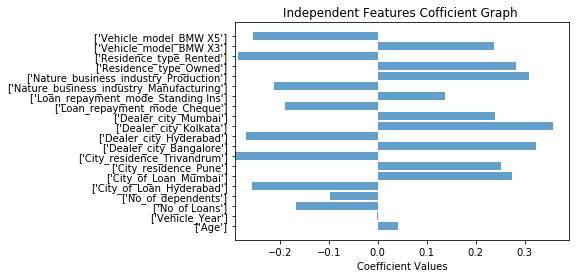

In [54]:
# easy graphical way to look into  Cofficients..
y_pos = np.arange(len(cols))
plt.barh(y_pos, cof, align='center', alpha=0.7)
plt.yticks(y_pos, cols)
plt.xlabel('Coefficient Values')
plt.title('Independent Features Cofficient Graph ')
plt.show()

### Let's compare the TRUE and PREDICTED Values of Dataset..

In [55]:
# checking the True Vaules and Predicted Values in the dataset..
print('True Values: {tru}'.format(tru = tru_values))
print('Predicted Value: {pred}'.format(pred = pred_values))

True Values: ('True:', array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1], dtype=int64))
Predicted Value: ('Pred:', array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1], dtype=int64))


### Now Let's use Confusion Matrix to know the correctness of 1's and 0's  from the overall target variable..

Confusion Matrix : 
[[82 56]
 [65 97]]


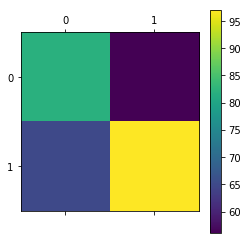

In [56]:
# Confusion Matrix to get the knowldge of Dependent(Default(Target)) Variable..
print('Confusion Matrix : ')
print (confussion_matrix)
plt.matshow(confussion_matrix)
plt.colorbar()

#### From above Table we conclude:
#### Out of total 138, 0's  82 are correct predicted.. and Out of  162, 1's 97 are correct predicted. 

# Now let get more depth , using AUC matric , Precision, Recall, F1-Score and ROC Curve

In [58]:
print  "----Base Model----"
#base rate auc
base_roc_auc = roc_auc_score(y_test,  base_model(X_test_selected))
print "Base Rate AUC = %2.5f" %base_roc_auc
print classification_report(y_test,base_model(X_test_selected))
print "\n\n----Logistic Model----"
#logistic AUC
print('Logistic AUC  {auc}'.format(auc=auc_processed))

print classification_report(y_test,model.predict(X_test_selected))

----Base Model----
Base Rate AUC = 0.50000
             precision    recall  f1-score   support

          0       0.46      1.00      0.63       138
          1       0.00      0.00      0.00       162

avg / total       0.21      0.46      0.29       300



----Logistic Model----
Logistic AUC  0.612453032743
             precision    recall  f1-score   support

          0       0.56      0.59      0.58       138
          1       0.63      0.60      0.62       162

avg / total       0.60      0.60      0.60       300



#### Precision -->  correctly identified examples.
#### Recall --> correctly classified fraction of observations


## Base Model Interpretation..
#### 1.) From above, In base model the precision level is average and recall is very good for people "who paid the loan amount" i.e., O's.
#### 2.) And for the ones who "Not repaid the loan amount" i.e., 1's  has precision and recall values as Big Zero.



## Logistic Model Interpretaion..
#### 1.) "Who paid the loan" i.e., 0's  have more than average(56%) Precision percentage and Recall percantage (59%).so our model has definitely improved for the ones who paid the load.
#### 2.) "Not paid the loan" i.e., 1's have  very good Precision percentage(63%) and at the same time very nice Recall percentage(60%) as well.  

##  Lets look "True Positive Rate" and "False Positive Rate " using ROC Curve..

#### True Positive Rate : Senstivity
#### False Positive Rate : (1- Specificity)

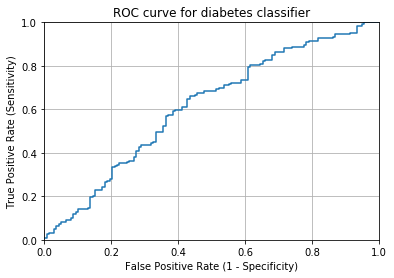

In [59]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pre_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

#### In the above ROC curve, as the Line approches, to the maximum value of Sensitivity (that is value 1 in the y-axis) the AUC becomes more and more.
#### And as the line bend towards the maximum value of 1- Specificity(that is value 1 in the x-axis) the AUC becomes less and less and model fades away..

# BUILDING MODEL USING UNPROCESSED DATA..!

In [60]:
# Drop missing values so model does not throw any error
df_unprocessed = data
df_unprocessed = df_unprocessed.dropna(axis=0, how='any')
print(data.shape)
print(df_unprocessed.shape)

(1000, 46)
(1000, 46)


In [61]:
# Remove non-numeric columns so model does not throw an error
for col_name in df_unprocessed.columns:
    if df_unprocessed[col_name].dtypes not in ['int32','int64','float32','float64']:
        df_unprocessed = df_unprocessed.drop(col_name, 1)

In [62]:
# Split into features and outcomes
X_unprocessed = df_unprocessed.drop('Default (Target)', 1)
y_unprocessed = df_unprocessed['Default (Target)']

In [63]:
# Take a look again at what the unprocessed feature set looks like
print(X_unprocessed.head(5))

   Customer_ID  Applied_Loan_Amt  Approved_loan_amount  Cheque_bounce_flag  \
0            1           1827908               1560894                   1   
1            2           2889515               1965892                   0   
2            3           2676500               2323693                   0   
3            4           2641164               1692244                   0   
4            5           2281611               1624686                   0   

   Customer_level_ltv  Dealer_ID  Down_payment  Installment_amt  \
0                  93      45281        144800            13633   
1                  96      54997        132246            10101   
2                  91      49429        273849            18144   
3                  91      54328        273036            16206   
4                  90      50604        253588            17666   

   Insurance_premium_amt  Insurance_sum_assured  Interest_rate  Vehicle_Year  \
0                   5831                1827908 

In [64]:
def find_model_perf_unprocessed(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test)]
    auc = roc_auc_score(y_test, y_hat)
    return auc

In [65]:
# Split unprocessed data into train and test set
# Build model and assess performance
X_train_unprocessed, X_test_unprocessed, y_train, y_test = train_test_split(
    X_unprocessed, y_unprocessed, train_size=0.70, random_state=1)

auc_unprocessed = find_model_perf_unprocessed(X_train_unprocessed, y_train, X_test_unprocessed, y_test)
print(auc_unprocessed)

0.413745490179


In [66]:
# Compare model performance
print('AUC of model with data preprocessing: {auc}'.format(auc=auc_processed))
print('AUC of model with data without preprocessing: {auc}'.format(auc=auc_unprocessed))
per_improve = ((auc_processed-auc_unprocessed)/auc_unprocessed)*100
print('Model improvement of preprocessing: {per_improve}%'.format(per_improve = per_improve))

AUC of model with data preprocessing: 0.612453032743
AUC of model with data without preprocessing: 0.413745490179
Model improvement of preprocessing: 48.0265156433%


##  From the above summary we are happy to know that our model with preprocessed data has made an improvement of 48%..

## Also we can bring lot more improvement using Algorithms like Random Forest. As Logistic Regression is mostly used for Interpretating the dataset..


# Thank YOU !! :)